In [8]:
from tracemalloc import start
import alpaca_trade_api as tradeapi
from alpaca_trade_api.stream import Stream
import matplotlib.pyplot as plt
from alpaca_trade_api.rest import REST, TimeFrame
import pandas as pd
from datetime import date, datetime
import time
import talib
import yfinance as yf
# import finplot as fplt

# classifier = pipeline('sentiment-analysis')
import warnings
warnings.filterwarnings("ignore")

[*********************100%***********************]  1 of 1 completed


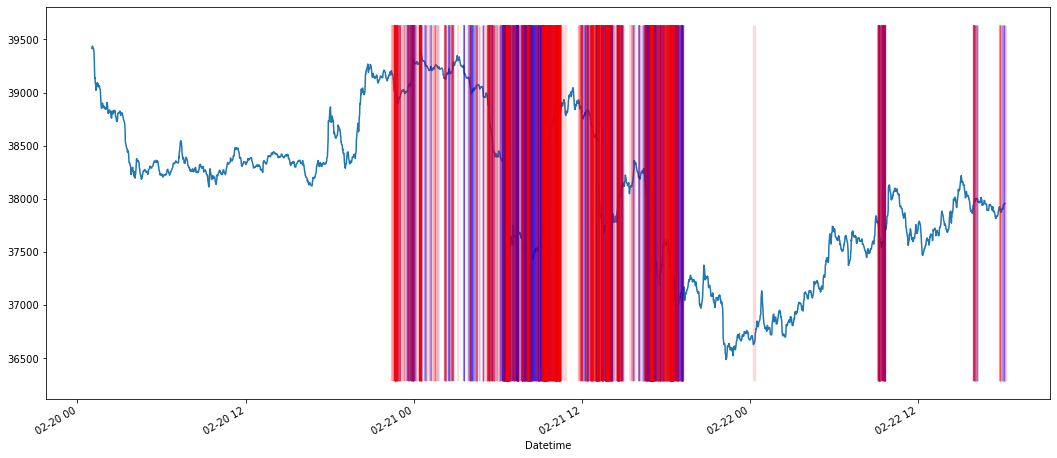

In [11]:
datetime_origin = '2022-02-19 10:30:00'
orders = pd.read_csv('large_ordersBTCUSD.txt')
orders.columns = ['DateTime', 'Size', 'Price', 'Side']
orders['DateTime'] = pd.to_datetime(orders['DateTime'])
orders.set_index('DateTime', inplace=True, drop = True)
orders.index = orders.index.tz_convert('US/Eastern')
orders = orders[orders.index > datetime_origin]
orders.Side = orders.Side.str.replace(' ', '')
orders = orders[orders.Size >= 1]
orders_B = orders[orders.Side == 'B']
orders_S = orders[orders.Side == 'S']
###########################################################################################
df = yf.download('BTC-USD', start = '2022-02-20', interval = '1m').tz_convert('US/Eastern')
df = df[df.index >= datetime_origin]
((df['Open']+df['Close'])/2).plot(figsize = (18,8))
plt.vlines(orders_S.index, ymin = df['Low'].min() - 200, ymax = df['Low'].max() + 200, color = 'b', lw=orders.Size, alpha=0.15)
plt.vlines(orders_B.index, ymin = df['Low'].min() - 200, ymax = df['Low'].max() + 200, color = 'r', lw=orders.Size, alpha=0.15)

In [16]:
orders.tail()

,Size,Price,Side
DateTime,,,
2022-02-21 17:53:34.382205-05:00,6.819700,37752.00,B
2022-02-21 17:56:53.451096-05:00,1.675072,37571.43,S
2022-02-21 18:01:17.854066-05:00,2.172900,37475.00,B
2022-02-21 18:02:11.558457-05:00,1.998575,37583.84,S
2022-02-21 18:02:33.058534-05:00,2.000000,37599.90,B


In [17]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-02-21 16:00:00-05:00,38256.417969,38283.906250,38185.757812,38261.222656,38261.222656,80709632
2022-02-21 16:30:00-05:00,38228.457031,38228.457031,37313.429688,37335.656250,37335.656250,242497536
2022-02-21 17:00:00-05:00,37288.765625,37419.273438,36950.476562,37208.542969,37208.542969,1177692160
2022-02-21 17:30:00-05:00,37200.167969,37620.964844,37169.933594,37584.714844,37584.714844,528607232
2022-02-21 18:00:00-05:00,37565.792969,37572.140625,37561.902344,37572.140625,37572.140625,8310784
